In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.font_manager as fm
import matplotlib.patheffects as path_effects
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score

In [2]:
# 한글 깨짐 방지
import matplotlib
import matplotlib.font_manager as fm
# fm._rebuild()
fm.get_fontconfig_fonts()
font_location = 'C:/Users/ASIA-19/NanumGothic.ttf' # 폰트 파일 이름, 디렉토리 주의
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

In [3]:
file = r"D:/work/python/a-truck-accident/data/cleandata_final.xlsx"
df = pd.read_excel(file, sheet_name="Sheet1")

In [4]:
print(df.head())

   사망  사고발생시각  일일 교통량  일일 교통량 평균  일일 속도평균  일일 속도75%  고속도로 교통량  고속도로별 로드킬  요일  \
0   0       1  670656        207       91       108     72960         59   3   
1   0       1  677088        241       94       108     72960         59   6   
2   0       3  677088        241       94       108     72960         59   6   
3   0       1  676800        245       89       104     72960         59   5   
4   0       3  676800        245       89       104     72960         59   5   

   제한차량_과적  ...      교통사고비용  위험운전행동  화물_관용  화물_자가용  화물_영업용  화물등록_계  주행거리당 사망수  \
0     2758  ...   5245000.0       0   2888  291305   23787  317980       17.6   
1     6875  ...  69085100.0       1   5582  682010  113674  801266        7.4   
2     6875  ...  12993100.0       1   5582  682010  113674  801266        7.4   
3      944  ...  10490000.0       1   1615  153093   33635  188343        5.0   
4     6875  ...  15735000.0       0   5582  682010  113674  801266        7.4   

   시도별_진료비  연령별_가해진료비  연령별_피해진료비

In [5]:
#결측치 제거
df.isnull().sum()

사망              0
사고발생시각          0
일일 교통량          0
일일 교통량 평균       0
일일 속도평균         0
일일 속도75%        0
고속도로 교통량        0
고속도로별 로드킬       0
요일              0
제한차량_과적         0
제한차량_적불         0
화물평균일교통량        0
부상자수            0
사고유형_사람_차_단독    0
안전운전불이행         0
가해연령대           0
교통사고비용          0
위험운전행동          0
화물_관용           0
화물_자가용          0
화물_영업용          0
화물등록_계          0
주행거리당 사망수       0
시도별_진료비         0
연령별_가해진료비       0
연령별_피해진료비       0
dtype: int64

In [6]:
print(df.columns)

Index(['사망', '사고발생시각', '일일 교통량', '일일 교통량 평균', '일일 속도평균', '일일 속도75%',
       '고속도로 교통량', '고속도로별 로드킬', '요일', '제한차량_과적', '제한차량_적불', '화물평균일교통량', '부상자수',
       '사고유형_사람_차_단독', '안전운전불이행', '가해연령대', '교통사고비용', '위험운전행동', '화물_관용',
       '화물_자가용', '화물_영업용', '화물등록_계', '주행거리당 사망수', '시도별_진료비', '연령별_가해진료비',
       '연령별_피해진료비'],
      dtype='object')


In [7]:
# # 1.RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

# # 기술 속성(descriptive features)
X = df.drop(['사망', '부상자수', '교통사고비용'], axis=1)
# # 대상 속성(target feature)
Y = df['사망']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,  stratify=Y)
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=10)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2090, 23)
(2090,)
(523, 23)
(523,)


In [8]:
# #데이터를 표준화 시킴
# from sklearn.preprocessing import StandardScaler


# #훈련용 뿐만 아니라 테스트용도 같이 

# ss = StandardScaler()
# ss.fit(X_train)
# train_scaled = ss.transform(X_train)
# test_scaled = ss.transform(X_test)

In [9]:
# ▶ stratify='Y' 옵션 결과 확인
pd.Series(Y_train).value_counts()

0    1919
1     171
Name: 사망, dtype: int64

In [10]:
125/(1271+125)

0.08954154727793696

In [11]:
# ▶ stratify='Y' 옵션 결과 확인
pd.Series(Y_test).value_counts()

0    480
1     43
Name: 사망, dtype: int64

In [12]:
42/(424+42)

0.09012875536480687

· 모델 학습 및 평가
모델을 학습하고 예측을 수행하여 성능을 평가

In [13]:
# ▶ 모델 학습
from sklearn.metrics import classification_report

rfc = RandomForestClassifier(random_state=123456)
rfc.fit(X_train, Y_train)

# ▶ 예측
# ▶ 예측은 학습에 사용된 Data와 Test Data 모두 예측하고 평가함(※ 과적합 여부 판별)
Y_pred_train = rfc.predict(X_train)
Y_pred_test = rfc.predict(X_test)

print(classification_report(Y_train, Y_pred_train))
print(classification_report(Y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1919
           1       1.00      1.00      1.00       171

    accuracy                           1.00      2090
   macro avg       1.00      1.00      1.00      2090
weighted avg       1.00      1.00      1.00      2090

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       480
           1       0.00      0.00      0.00        43

    accuracy                           0.91       523
   macro avg       0.46      0.50      0.48       523
weighted avg       0.84      0.91      0.88       523



In [14]:
pd.Series(Y_pred_train).value_counts()

0    1919
1     171
dtype: int64

In [15]:
# ▶ Q. [Test] Precision = 0.60, threshold = ? ↓(base:0.5), Recall = ?
pd.Series(Y_pred_test).value_counts()

0    521
1      2
dtype: int64

In [16]:
from sklearn.preprocessing import Binarizer

# ▶ threshold를 증가시키면, 진짜 정답일 데이터를 예측할 것이므로 precision 값이 증가 (※ 예측하는 개수 감소)
# ▶ threshold를 감소시키면, 조금 이라도 가능성이 있는 정답을 더 많이 예측하므로 recall 값이 증가 (※ 예측하는 개수 증가)
# Input_threshold = 0.405
Input_threshold = 0.100

pred_proba_test = rfc.predict_proba(X_test)[:,1].reshape(-1,1)
custom_predict = Binarizer(threshold=Input_threshold).fit_transform(pred_proba_test)

# ▶ 성능평가 확인
print(classification_report(Y_test, custom_predict))

              precision    recall  f1-score   support

           0       0.95      0.62      0.75       480
           1       0.13      0.63      0.21        43

    accuracy                           0.62       523
   macro avg       0.54      0.62      0.48       523
weighted avg       0.88      0.62      0.71       523



In [17]:
pd.Series(custom_predict.reshape(-1)).value_counts()

0.0    313
1.0    210
dtype: int64

In [18]:
# ▶ 과적합 문제, Train과 Test set에 성능을 최대한 줄여주는 것이 과적합을 방지
from sklearn.metrics import roc_auc_score

Y_pred_train_proba = rfc.predict_proba(X_train)[:, 1] 
Y_pred_test_proba = rfc.predict_proba(X_test)[:, 1] 


roc_score_train = roc_auc_score(Y_train, Y_pred_train_proba)
roc_score_test = roc_auc_score(Y_test, Y_pred_test_proba)

print("roc_score_train :", roc_score_train)
print("roc_score_test :", roc_score_test)

roc_score_train : 1.0
roc_score_test : 0.6340600775193799


In [19]:
from sklearn.metrics import roc_curve
def roc_curve_plot(Y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(Y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random', color='red')
  
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

C:\Users\ASIA-19\AppData\Local\Temp/ipykernel_18264/332527051.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label='Random', color='red')


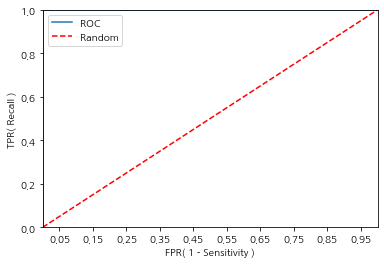

In [20]:
roc_curve_plot(Y_train, Y_pred_train_proba)

C:\Users\ASIA-19\AppData\Local\Temp/ipykernel_18264/332527051.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label='Random', color='red')


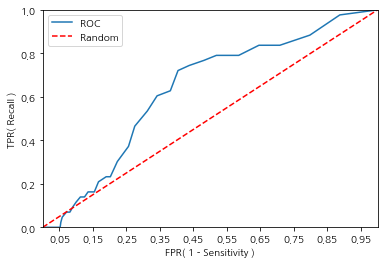

In [21]:
roc_curve_plot(Y_test, Y_pred_test_proba)

· 중요 변수 파악
Feature IMP 분석을 통한 중요변수 파악

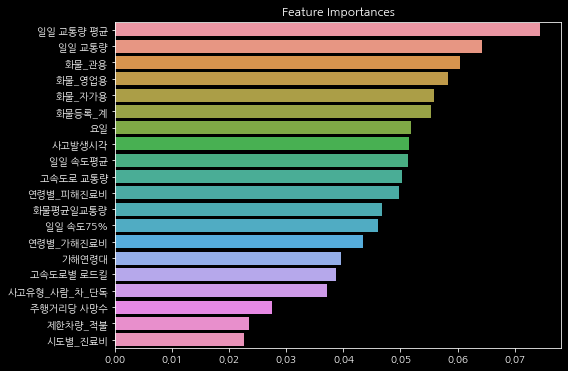

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

ftr_importances_values = rfc.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

· 모델 Save and Read
최종 모델을 저장 및 다시 불러오기

In [23]:
# import pickle
# # 모델 저장
# saved_model = pickle.dumps(rfc)

# # 모델 Read
# clf_from_pickle = pickle.loads(saved_model)